# Assignment 2 - Khaled Gaber 1004144302

# Required Installations

In [179]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: C:\Users\khale\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [180]:
!pip install tweedledum

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: C:\Users\khale\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [181]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to c:\users\khale\appdata\local\temp\pip-req-build-to9vk380
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git 'C:\Users\khale\AppData\Local\Temp\pip-req-build-to9vk380'

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: C:\Users\khale\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [285]:
#Libraries Needed
import matplotlib.pyplot as plt
import math
import numpy as np

from qiskit.circuit.library import PhaseOracle, GroverOperator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile, execute, IBMQ, assemble
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.providers.ibmq import least_busy

# Grover's Search Algorithm (Introduction) [Done]
Following textbook: https://learn.qiskit.org/course/introduction/grovers-search-algorithm

## First Implementation

In [183]:
with open('3sat.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)  # let's check the file is as promised

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


In [184]:
oracle = PhaseOracle.from_dimacs_file('3sat.dimacs')
oracle.draw()

┌───┐┌───┐┌───┐   
q_0: ──■──┤ X ├┤ Z ├┤ X ├─o─
       │  └───┘└───┘└───┘ │ 
q_1: ──■──────────────────■─
     ┌───┐                │ 
q_2: ┤ Z ├────────────────o─
     └───┘

In [185]:
init = QuantumCircuit(3)
init.h([0,1,2])
init.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [186]:
grover_operator = GroverOperator(oracle)

In [187]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw()

┌───┐┌────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0   ├─░─┤M├──────
        ├───┤│    │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 Q ├─░──╫─┤M├───
        ├───┤│    │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2   ├─░──╫──╫─┤M├
        └───┘└────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════╩══╩══╩═
                       0  1  2

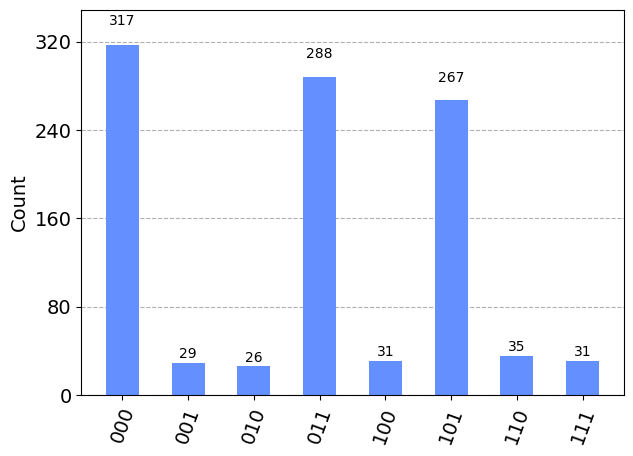

In [188]:
# Simulate the circuit
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
plot_histogram(counts)

## Circuit Implementation

Basic Oracle implementation of a circuit that flips the phase of the state |11>

In [189]:
oracle = QuantumCircuit(2)
oracle.cz(0,1)
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [190]:
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

In [191]:
display_unitary(oracle, "U_\\text{oracle}=")

<IPython.core.display.Latex object>

From Qiskit:

> Can you create 3 more oracle circuits that instead target the other 3 computational basis states (|00>, |01> and|10> )? Use display_unitary to check your answer.
>
> Hint: Try to create circuits that transform  to and from the basis state you're targeting, can you then use these circuits with the cz gate?

Oracle |00>

In [192]:
oracle_00 = QuantumCircuit(2)
oracle_00.cz(1, 0)
oracle_00.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [193]:
display_unitary(oracle_00, "U_\\text{oracle 00}=")

<IPython.core.display.Latex object>

Oracle |01>

In [194]:
oracle_01 = QuantumCircuit(2)
oracle_01.x(1)
oracle_01.cz(1, 0)
oracle_01.x(1)
oracle_01.draw()

q_0: ──────■──────
     ┌───┐ │ ┌───┐
q_1: ┤ X ├─■─┤ X ├
     └───┘   └───┘

In [195]:
display_unitary(oracle_01, "U_\\text{oracle 01}=")

<IPython.core.display.Latex object>

Oracle |10>

In [196]:
oracle_10 = QuantumCircuit(2)
oracle_10.x(0)
oracle_10.cz(1, 0)
oracle_10.x(0)
oracle_10.draw()

┌───┐   ┌───┐
q_0: ┤ X ├─■─┤ X ├
     └───┘ │ └───┘
q_1: ──────■──────

In [197]:
display_unitary(oracle_10, "U_\\text{oracle 10}=")

<IPython.core.display.Latex object>

### Creating Diffuser

In [198]:
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [199]:
diffuser.x([0,1])
diffuser.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     ├───┤├───┤
q_1: ┤ H ├┤ X ├
     └───┘└───┘

In [200]:
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw()

┌───┐┌───┐   ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
     ├───┤├───┤ │ ├───┤├───┤
q_1: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
     └───┘└───┘   └───┘└───┘

Putting it together

In [201]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialise |s>
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

In [202]:
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}

Following Qiskit

>Try replacing the oracle in this circuit with the different oracles you created above. Do you get the expected result?

Oracle |00>

In [203]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialise |s>
grover = grover.compose(oracle_00)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

In [204]:
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}

Oracle |01>

In [205]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialise |s>
grover = grover.compose(oracle_01)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

┌───┐        ┌───┐┌───┐        ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──────■─┤ H ├┤ X ├──────■─┤ X ├┤ H ├─░─┤M├───
        ├───┤┌───┐ │ ├───┤├───┤┌───┐ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘└───┘   └───┘└───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════╩══╩═
                                                     0  1

In [206]:
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'01': 1024}

Oracle |10>

In [207]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialise |s>
grover = grover.compose(oracle_10)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

┌───┐┌───┐   ┌───┐┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├┤ X ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤└───┘ │ ├───┤├───┤└───┘ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├──────■─┤ H ├┤ X ├──────■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘        └───┘└───┘        └───┘└───┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════╩══╩═
                                                     0  1

In [208]:
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'10': 1024}

# Grover's Algorithm (V2) [Done]
Following Textbook: https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm

Qiskit Implementation

In [210]:
n = 2
grover_circuit = QuantumCircuit(n)

In [211]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [212]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [213]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

In [214]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

Experimenting with Simulators

In [215]:
sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()
array_to_latex(statevec, prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

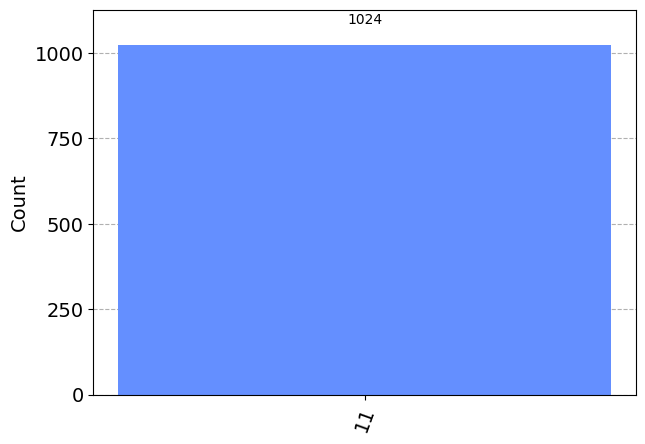

In [216]:
grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(grover_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

## 3. Example: 3 Qubits
Grover's algorithm for 3 qubits with two marked states|101> and |110>

In [217]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

In [218]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [219]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌─────────────┐┌────────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0            ├┤0       ├─░─┤M├──────
        ├───┤│             ││        │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 U$_\omega$ ├┤1 U$_s$ ├─░──╫─┤M├───
        ├───┤│             ││        │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2            ├┤2       ├─░──╫──╫─┤M├
        └───┘└─────────────┘└────────┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════╩══╩══╩═
                                          0  1  2

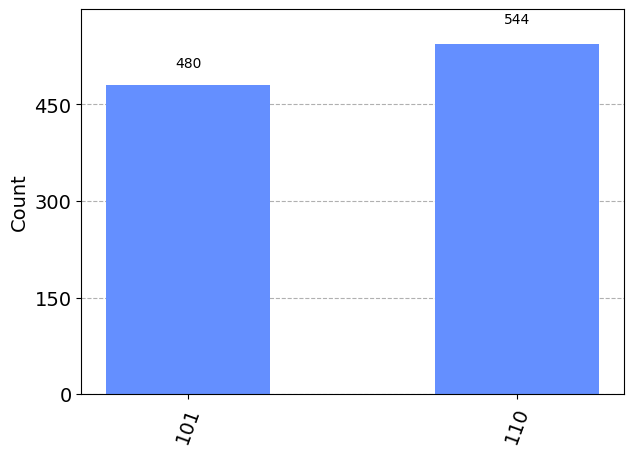

In [220]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

## 4. Problems

In [221]:
from qiskit_textbook.problems import grover_problem_oracle
## Example Usage
n = 4
oracle = grover_problem_oracle(n, variant=1)  # 0th variant of oracle, with n qubits
qc = QuantumCircuit(n)
qc.append(oracle, [0,1,2,3])
qc.draw()

┌────────────────────┐
q_0: ┤0                   ├
     │                    │
q_1: ┤1                   ├
     │  Oracle
n=4, var=1 │
q_2: ┤2                   ├
     │                    │
q_3: ┤3                   ├
     └────────────────────┘

### Question 1
> grover_problem_oracle(4, variant=2) uses 4 qubits and has 1 solution.

> a. How many iterations do we need to have a > 90% chance of measuring this solution?

For 1 solution and n=4 qubits, optimal number of iterations is $\frac{\sqrt{2^n}}{2}$ = $\frac{\sqrt{2^4}}{2}$ =2

> b. Use Grover's algorithm to find this solution state. 

{'1100': 29, '0011': 585, '0110': 32, '0101': 32, '1001': 28, '1011': 28, '1000': 32, '0111': 40, '0100': 22, '0010': 26, '0000': 27, '1110': 26, '0001': 21, '1010': 27, '1111': 20, '1101': 25}


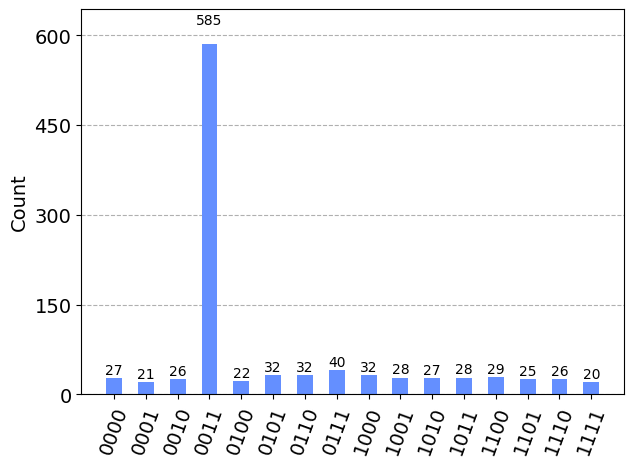

In [277]:
qc = QuantumCircuit(4, 4)
oracle_ex4 = grover_problem_oracle(4, variant=2)

# Initialize to superposition
qc.h([0,1,2,3])

# Apply Grover's iteration
qc.append(oracle_ex4, [0,1,2,3])
qc.append(diffuser(4), [0,1,2,3])

# Repeat the iteration
for _ in range(3):
    qc.append(oracle_ex4, [0,1,2,3])
    qc.append(diffuser(4), [0,1,2,3])

# Measure the qubits
qc.measure([0,1,2,3], [0,1,2,3])

# Execute the circuit
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
print(counts)
plot_histogram(counts)

>c. What happens if we apply more iterations than the number we calculated in problem 1a above? Why?

We may decrease the chance of finding our solution because we have over-rotated and overshot our target state, so |s'> =/= |w>

This is shown below:

{'0110': 46, '0101': 67, '0111': 76, '0001': 69, '1101': 70, '0100': 71, '0010': 67, '1000': 61, '1010': 77, '0011': 28, '1011': 57, '1110': 62, '1111': 55, '1100': 70, '0000': 63, '1001': 61}


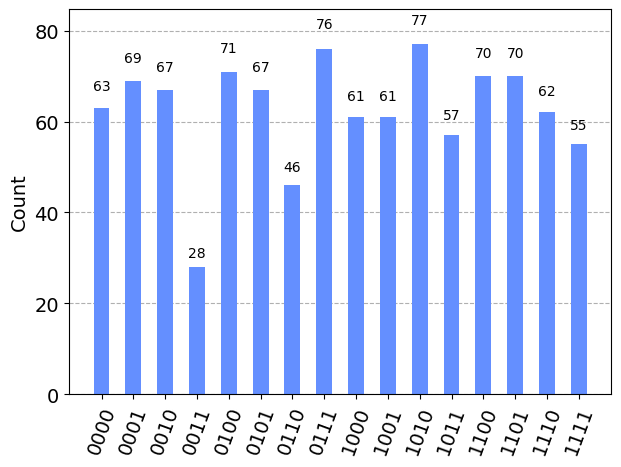

In [279]:
qc = QuantumCircuit(4, 4)
oracle_ex4 = grover_problem_oracle(4, variant=2)

# Initialize to superposition
qc.h([0,1,2,3])

# Apply Grover's iteration
qc.append(oracle_ex4, [0,1,2,3])
qc.append(diffuser(4), [0,1,2,3])

# Repeat the iteration
for _ in range(5):
    qc.append(oracle_ex4, [0,1,2,3])
    qc.append(diffuser(4), [0,1,2,3])

# Measure the qubits
qc.measure([0,1,2,3], [0,1,2,3])

# Execute the circuit
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
print(counts)
plot_histogram(counts)

### Question 2

>2. With 2 solutions and 4 qubits, how many iterations do we need for a >90% chance of measuring a solution? Test your answer using the oracle grover_problem_oracle(4, variant=1) (which has two solutions). Test your answer using the oracle grover_problem_oracle(4, variant=1) (which has two solutions).

Iterations needed is $\sqrt{2}$ so ~1 iteration. I tried experimenting with 1 and 2, as shown below

{'1010': 4, '1001': 469, '0111': 473, '0011': 5, '0101': 3, '1000': 6, '0000': 4, '0110': 6, '1110': 4, '1111': 4, '0010': 5, '1100': 4, '1101': 4, '0001': 4, '1011': 4, '0100': 1}


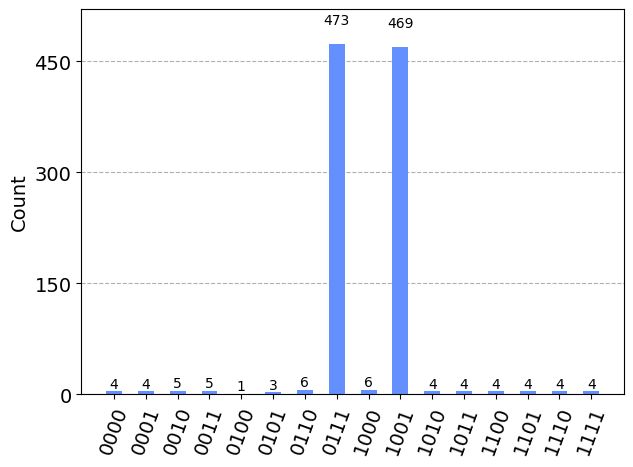

In [280]:
#1 Rotation
qc = QuantumCircuit(4, 4)
oracle_ex2_4 = grover_problem_oracle(4, variant=1)

# Initialize to superposition
qc.h([0,1,2,3])

# Apply Grover's iteration
qc.append(oracle_ex2_4, [0,1,2,3])
qc.append(diffuser(4), [0,1,2,3])

# Repeat the iteration
for _ in range(1):
    qc.append(oracle_ex2_4, [0,1,2,3])
    qc.append(diffuser(4), [0,1,2,3])

# Measure the qubits
qc.measure([0,1,2,3], [0,1,2,3])

# Execute the circuit
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
print(counts)
plot_histogram(counts)

{'1010': 57, '1001': 174, '1110': 55, '1000': 46, '0000': 56, '0011': 38, '0111': 170, '1101': 48, '1111': 48, '0010': 41, '0110': 44, '1011': 55, '0101': 40, '0001': 50, '1100': 37, '0100': 41}


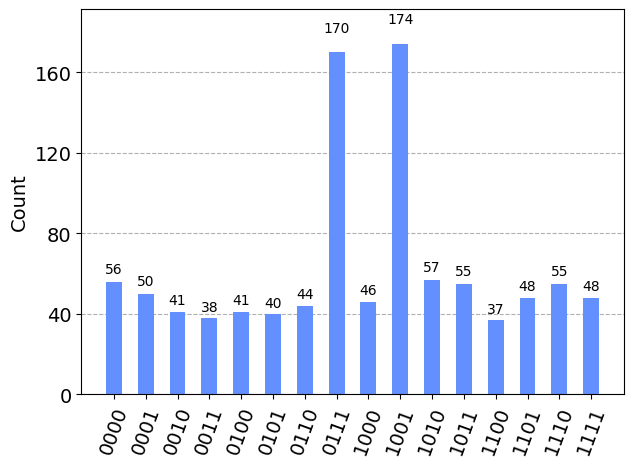

In [281]:
#2 Rotations
qc = QuantumCircuit(4, 4)
oracle_ex2_4 = grover_problem_oracle(4, variant=1)

# Initialize to superposition
qc.h([0,1,2,3])

# Apply Grover's iteration
qc.append(oracle_ex2_4, [0,1,2,3])
qc.append(diffuser(4), [0,1,2,3])

# Repeat the iteration
for _ in range(2):
    qc.append(oracle_ex2_4, [0,1,2,3])
    qc.append(diffuser(4), [0,1,2,3])

# Measure the qubits
qc.measure([0,1,2,3], [0,1,2,3])

# Execute the circuit
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
print(counts)
plot_histogram(counts)

We can see from comparing the two graphs, the probability is higher for 1 rotation.

### Question 3
>Create a function, grover_solver(oracle, iterations) that takes as input:
>
>- A Grover oracle as a gate (oracle)
>- An integer number of iterations (iterations)
>
>and returns a QuantumCircuit that performs Grover's algorithm on the 'oracle' gate, with 'iterations' iterations.

In [283]:
def grover_solver(oracle, iterations):
    n = oracle.num_qubits  # Get the number of qubits from the oracle
    qc = QuantumCircuit(n, n)

    # Initialize to superposition
    qc.h(range(n))

    # Apply Grover's iterations
    for _ in range(iterations):
        qc.append(oracle, range(n))
        qc.append(diffuser(n), range(n))

    # Measure the qubits
    qc.measure(range(n), range(n))
    
    return qc

{'1101': 22, '1001': 373, '0111': 398, '1011': 14, '0010': 17, '1000': 15, '1111': 21, '1110': 12, '0001': 17, '0110': 10, '0101': 13, '1100': 15, '1010': 14, '0011': 20, '0100': 20, '0000': 19}


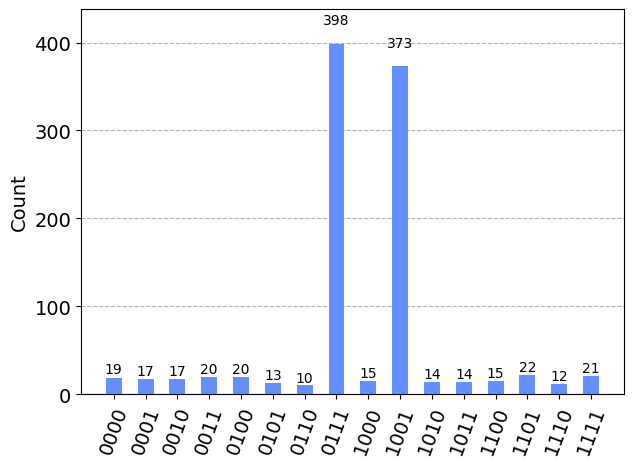

In [284]:
# Example Usage:
oracle = grover_problem_oracle(4, variant=1)
iterations = 1
qc = grover_solver(oracle, iterations)

# Execute the circuit
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
print(counts)
plot_histogram(counts)

## Solving Suduko using Grover's Algorithm

In [241]:
clause_list = [ [0,1],
               [0,2],
               [1,3],
               [2,3] ]

In [242]:
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

In [243]:
# We will use separate registers to name the bits
in_qubits = QuantumRegister(2, name='input')
out_qubit = QuantumRegister(1, name='output')
qc = QuantumCircuit(in_qubits, out_qubit)
XOR(qc, in_qubits[0], in_qubits[1], out_qubit)
qc.draw()

input_0: ──■───────
           │       
input_1: ──┼────■──
         ┌─┴─┐┌─┴─┐
 output: ┤ X ├┤ X ├
         └───┘└───┘

In [244]:
# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')  # variable bits
clause_qubits = QuantumRegister(4, name='c')  # bits to store clause-checks

# Create quantum circuit
qc = QuantumCircuit(var_qubits, clause_qubits)

# Use XOR gate to check each clause
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit)

# Compute clauses
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

# Flip 'output' bit if all clauses are satisfied
qc.mct(clause_qubits, output_qubit)

qc.draw()

v_0: ──■─────────■───────────────────────────
       │         │                           
v_1: ──┼────■────┼─────────■─────────────────
       │    │    │         │                 
v_2: ──┼────┼────┼────■────┼─────────■───────
       │    │    │    │    │         │       
v_3: ──┼────┼────┼────┼────┼────■────┼────■──
     ┌─┴─┐┌─┴─┐  │    │    │    │    │    │  
c_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼──
     └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │  
c_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼──
               └───┘└───┘┌─┴─┐┌─┴─┐  │    │  
c_2: ────────────────────┤ X ├┤ X ├──┼────┼──
                         └───┘└───┘┌─┴─┐┌─┴─┐
c_3: ──────────────────────────────┤ X ├┤ X ├
                                   └───┘└───┘

In [245]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1
sudoku_oracle(qc, clause_list, clause_qubits)
qc.draw()

»
    v_0: ──■─────────■──────────────────────────────────■─────────■────────────»
           │         │                                  │         │            »
    v_1: ──┼────■────┼─────────■────────────────────────┼────■────┼─────────■──»
           │    │    │         │                        │    │    │         │  »
    v_2: ──┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼──»
           │    │    │    │    │         │              │    │    │    │    │  »
    v_3: ──┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼──»
         ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │  »
    c_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼──»
         └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │  »
    c_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼──»
                   └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐»
    c_2: ────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├»
                             └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘»
    c_3: ──────────────────────────────┤ X ├┤ X ├──■───────────────────────────»
                                       └───┘└───┘┌─┴─┐                         »
    out: ────────────────────────────────────────┤ X ├─────────────────────────»
                                                 └───┘                         »
cbits: 4/══════════════════════════════════════════════════════════════════════»
                                                                               »
«                        
«    v_0: ───────────────
«                        
«    v_1: ───────────────
«                        
«    v_2: ───────■───────
«                │       
«    v_3: ──■────┼────■──
«           │    │    │  
«    c_0: ──┼────┼────┼──
«           │    │    │  
«    c_1: ──┼────┼────┼──
«         ┌─┴─┐  │    │  
«    c_2: ┤ X ├──┼────┼──
«         └───┘┌─┴─┐┌─┴─┐
«    c_3: ─────┤ X ├┤ X ├
«              └───┘└───┘
«    out: ───────────────
«                        
«cbits: 4/═══════════════
«

In [246]:
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

## First Iteration
# Apply our oracle
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(4), [0,1,2,3])

## Second Iteration
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(4), [0,1,2,3])

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw(fold=-1)

┌───┐               ░                                                                                       ░ ┌────────┐                                                                                      ░ ┌────────┐┌─┐         
    v_0: ─────────────┤ H ├───────────────░───■─────────■──────────────────────────────────■─────────■────────────────────────────░─┤0       ├──■─────────■──────────────────────────────────■─────────■────────────────────────────░─┤0       ├┤M├─────────
                      ├───┤               ░   │         │                                  │         │                            ░ │        │  │         │                                  │         │                            ░ │        │└╥┘┌─┐      
    v_1: ─────────────┤ H ├───────────────░───┼────■────┼─────────■────────────────────────┼────■────┼─────────■──────────────────░─┤1       ├──┼────■────┼─────────■────────────────────────┼────■────┼─────────■──────────────────░─┤1       ├─╫─┤M├──────
                      ├───┤               ░   │    │    │         │                        │    │    │         │                  ░ │  U$_s$ │  │    │    │         │                        │    │    │         │                  ░ │  U$_s$ │ ║ └╥┘┌─┐   
    v_2: ─────────────┤ H ├───────────────░───┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼─────────■────────░─┤2       ├──┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼─────────■────────░─┤2       ├─╫──╫─┤M├───
                      ├───┤               ░   │    │    │    │    │         │              │    │    │    │    │         │        ░ │        │  │    │    │    │    │         │              │    │    │    │    │         │        ░ │        │ ║  ║ └╥┘┌─┐
    v_3: ─────────────┤ H ├───────────────░───┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼────■────┼────■───░─┤3       ├──┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼────■────┼────■───░─┤3       ├─╫──╫──╫─┤M├
                      └───┘               ░ ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ └────────┘┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ └────────┘ ║  ║  ║ └╥┘
    c_0: ─────────────────────────────────░─┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░───────────┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░────────────╫──╫──╫──╫─
                                          ░ └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │   ░           └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │   ░            ║  ║  ║  ║ 
    c_1: ─────────────────────────────────░───────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼────┼────┼────┼───░─────────────────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼────┼────┼────┼───░────────────╫──╫──╫──╫─
                                          ░           └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐┌─┴─┐  │    │   ░                     └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐┌─┴─┐  │    │   ░            ║  ║  ║  ║ 
    c_2: ─────────────────────────────────░─────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼───░───────────────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼───░────────────╫──╫──╫──╫─
                                          ░                     └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐ ░                               └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐ ░            ║  ║  ║  ║ 
    c_3: ─────────────────────────────────░───────────────────────────────┤ X ├┤ X ├──■────────────────────────────────┤ X ├┤ X ├─░─────────────────────────────────────────┤ X ├┤ X ├──■────────────────────────────────┤ X ├┤ X ├

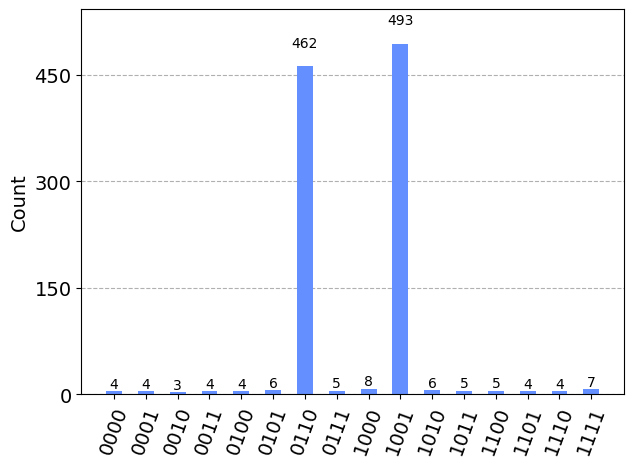

In [247]:
# Simulate and plot results
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_simulator)
result = qasm_sim.run(transpiled_qc).result()
plot_histogram(result.get_counts())

## Triangle Finding Problem Using Grover

In [258]:
#Edges list
edges =[(0, 1), (0, 2), (1, 2), (2, 3)]
#Number of nodes
n_nodes = 4

In [259]:
#We used the W state implementation from W state in reference 6
def control_rotation (qcir,cQbit,tQbit,theta):
    """ Create an intermediate controlled rotation using only unitary gate and controlled-NOT
    
    Args:
    qcir: QuantumCircuit instance to apply the controlled rotation to.
    cQbit: control qubit. 
    tQbit: target qubit.
    theta: rotation angle.
    
    Returns:
    A modified version of the QuantumCircuit instance with control rotation applied.
    
    """
    theta_dash = math.asin(math.cos(math.radians(theta/2)))
    qcir.u(theta_dash,0,0,tQbit)
    qcir.cx(cQbit,tQbit)
    qcir.u(-theta_dash,0,0,tQbit)
    return qcir

In [260]:
def wn (qcir,qbits): 
    """ Create the W-state using the control-rotation function.
    
    Args:
    qcir: QuantumCircuit instance used to construct the W-state.
    qbits: the qubits used to construct the W-state.
    
    Returns:
    A modified version of the QuantumCircuit instance with the W-state construction gates.
    
    """
    for i in range(len(qbits)):
        if i == 0:
            qcir.x(qbits[0])
            qcir.barrier()
        else:
            p = 1/(len(qbits)-(i-1))
            theta = math.degrees(math.acos(math.sqrt(p)))
            theta = 2* theta
            qcir = control_rotation(qcir,qbits[i-1],qbits[i],theta)
            qcir.cx(qbits[i],qbits[i-1])
            qcir.barrier()
    return qcir,qbits

In [261]:
sub_qbits = QuantumRegister(n_nodes)
sub_cir = QuantumCircuit(sub_qbits, name="state_prep")
sub_cir, sub_qbits = wn(sub_cir, sub_qbits)
sub_cir.x(sub_qbits)
stat_prep = sub_cir.to_instruction()
inv_stat_prep = sub_cir.inverse().to_instruction()

In [262]:
def edge_counter(qc,qubits,anc,flag_qubit,k):
    bin_k = bin(k)[2:][::-1]
    l = []
    for i in range(len(bin_k)):
        if int(bin_k[i]) == 1:
            l.append(qubits[i])
    qc.mct(l,flag_qubit,[anc])

In [263]:
def oracle(n_nodes, edges, qc, nodes_qubits, edge_anc, ancilla, neg_base):
    k = 3 #k is the number of edges, in case of a triangle, it's 3
    #1- edge counter
    #forward circuit
    qc.barrier()
    qc.ccx(nodes_qubits[edges[0][0] ],nodes_qubits[edges[0][1] ],edge_anc[0])
    for i in range(1,len(edges)):
        qc.mct([nodes_qubits[edges[i][0] ],nodes_qubits[edges[i][1] ],edge_anc[0] ], edge_anc[1], [ancilla[0] ])
        qc.ccx(nodes_qubits[edges[i][0] ],nodes_qubits[edges[i][1] ],edge_anc[0])
    #----------------------------------------------------------------------------------------------------------
     #Edges check Qubit
    edg_k = int((k/2)*(k-1))
    edge_counter(qc,edge_anc,ancilla[0],neg_base[0],edg_k)
    #----------------------------------------------------------------------------------------------------------

    #4- Reverse edge count
    for i in range(len(edges)-1,0,-1):
        qc.ccx(nodes_qubits[edges[i][0] ],nodes_qubits[edges[i][1] ],edge_anc[0])
        qc.mct([nodes_qubits[edges[i][0] ],nodes_qubits[edges[i][1] ],edge_anc[0] ], edge_anc[1], [ancilla[0] ])
    qc.ccx(nodes_qubits[edges[0][0] ],nodes_qubits[edges[0][1] ],edge_anc[0])
    qc.barrier()

In [265]:
#Diffusion Operator
def cnz(qc, num_control, node, anc):
    """Construct a multi-controlled Z gate
    
    Args:
    num_control :  number of control qubits of cnz gate
    node :             node qubits
    anc :               ancillaly qubits
    """
    if num_control>2:
        qc.ccx(node[0], node[1], anc[0])
        for i in range(num_control-2):
            qc.ccx(node[i+2], anc[i], anc[i+1])
        qc.cz(anc[num_control-2], node[num_control])
        for i in range(num_control-2)[::-1]:
            qc.ccx(node[i+2], anc[i], anc[i+1])
        qc.ccx(node[0], node[1], anc[0])
    if num_control==2:
        qc.h(node[2])
        qc.ccx(node[0], node[1], node[2])
        qc.h(node[2])
    if num_control==1:
        qc.cz(node[0], node[1])

In [266]:
def grover_diff(qc, nodes_qubits,edge_anc,ancilla,stat_prep,inv_stat_prep):
    qc.append(inv_stat_prep,qargs=nodes_qubits)
    qc.x(nodes_qubits)
    #====================================================
        #3 control qubits Z gate
    cnz(qc,len(nodes_qubits)-1,nodes_qubits[::-1],ancilla)
    #====================================================
    qc.x(nodes_qubits)
    qc.append(stat_prep,qargs=nodes_qubits)

In [267]:
# Grover algo function
def grover(n_nodes,stat_prep,inv_stat_prep):
    #N = 2**n_nodes  # for optimal iterations count if the state prep is done using only H gates.
    N = math.comb(n_nodes, 3) #Since we are using W-state to perform initial preparation.
    nodes_qubits = QuantumRegister(n_nodes, name='nodes')
    edge_anc = QuantumRegister(2, name='edge_anc')
    ancilla = QuantumRegister(n_nodes-2, name = 'cccx_diff_anc')
    neg_base = QuantumRegister(1, name='check_qubits')
    class_bits = ClassicalRegister(n_nodes, name='class_reg')
    tri_flag = ClassicalRegister(3, name='tri_flag')
    qc = QuantumCircuit(nodes_qubits, edge_anc, ancilla, neg_base, class_bits, tri_flag)
    # Initialize qunatum flag qubits in |-> state
    qc.x(neg_base[0])
    qc.h(neg_base[0])
    # Initializing i/p qubits in superposition
    qc.append(stat_prep,qargs=nodes_qubits)
    qc.barrier()
    # Calculate iteration count
    iterations = math.floor(math.pi/4*math.sqrt(N))
    # Calculate iteration count
    for i in np.arange(iterations):
        qc.barrier()
        oracle(n_nodes, edges, qc, nodes_qubits, edge_anc,  ancilla, neg_base)
        qc.barrier()
        grover_diff(qc, nodes_qubits,edge_anc,ancilla,stat_prep,inv_stat_prep)
    qc.measure(nodes_qubits,class_bits)
    return qc

In [268]:
qc = grover(n_nodes,stat_prep,inv_stat_prep)
qc.draw()

┌─────────────┐      ░  ░  ░                               »
        nodes_0: ┤0            ├──────░──░──░───■────■────■─────────────────»
                 │             │      ░  ░  ░   │    │    │                 »
        nodes_1: ┤1            ├──────░──░──░───■────┼────┼────■────■───────»
                 │  state_prep │      ░  ░  ░   │    │    │    │    │       »
        nodes_2: ┤2            ├──────░──░──░───┼────■────■────■────■────■──»
                 │             │      ░  ░  ░   │    │    │    │    │    │  »
        nodes_3: ┤3            ├──────░──░──░───┼────┼────┼────┼────┼────■──»
                 └─────────────┘      ░  ░  ░ ┌─┴─┐  │  ┌─┴─┐  │  ┌─┴─┐  │  »
     edge_anc_0: ─────────────────────░──░──░─┤ X ├──■──┤ X ├──■──┤ X ├──■──»
                                      ░  ░  ░ └───┘┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐»
     edge_anc_1: ─────────────────────░──░──░──────┤ X ├─────┤ X ├─────┤ X ├»
                                      ░  ░  ░      └───┘     └───┘     └───┘»
cccx_diff_anc_0: ─────────────────────░──░──░───────────────────────────────»
                                      ░  ░  ░                               »
cccx_diff_anc_1: ─────────────────────░──░──░───────────────────────────────»
                      ┌───┐     ┌───┐ ░  ░  ░                               »
   check_qubits: ─────┤ X ├─────┤ H ├─░──░──░───────────────────────────────»
                      └───┘     └───┘ ░  ░  ░                               »
    class_reg: 4/═══════════════════════════════════════════════════════════»
                                                                            »
     tri_flag: 3/═══════════════════════════════════════════════════════════»
                                                                            »
«                                                               ░  ░ »
«        nodes_0: ────────────────────────────────■────■────■───░──░─»
«                                                 │    │    │   ░  ░ »
«        nodes_1: ──────────────────────■────■────┼────┼────■───░──░─»
«                                       │    │    │    │    │   ░  ░ »
«        nodes_2: ──■─────────■────■────■────■────■────■────┼───░──░─»
«                   │         │    │    │    │    │    │    │   ░  ░ »
«        nodes_3: ──■─────────■────■────┼────┼────┼────┼────┼───░──░─»
«                 ┌─┴─┐     ┌─┴─┐  │  ┌─┴─┐  │  ┌─┴─┐  │  ┌─┴─┐ ░  ░ »
«     edge_anc_0: ┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├─░──░─»
«                 └───┘  │  └───┘┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐└───┘ ░  ░ »
«     edge_anc_1: ───────■───────┤ X ├─────┤ X ├─────┤ X ├──────░──░─»
«                        │       └───┘     └───┘     └───┘      ░  ░ »
«cccx_diff_anc_0: ───────┼──────────────────────────────────────░──░─»
«                        │                                      ░  ░ »
«cccx_diff_anc_1: ───────┼──────────────────────────────────────░──░─»
«                      ┌─┴─┐                                    ░  ░ »
«   check_qubits: ─────┤ X ├────────────────────────────────────░──░─»
«                      └───┘                                    ░  ░ »
«    class_reg: 4/═══════════════════════════════════════════════════»
«                                                                    »
«     tri_flag: 3/═══════════════════════════════════════════════════»
«                                                                    »
«                 ┌────────────────┐┌───┐             ┌───┐          »
«        nodes_0: ┤0               ├┤ X ├───────────■─┤ X ├──────────»
«                 │                │├───┤           │ └───┘┌───┐     »
«        nodes_1: ┤1               ├┤ X ├───────■───┼───■──┤ X ├─────»
«                 │  state_prep_dg │├───┤       │   │   │  └───┘┌───┐»
«        nodes_2: ┤2               ├┤ X ├──■────┼───┼───┼────■──┤ X ├»
«                 │                │├───┤  │    │   │   │    │  ├───┤»
«        nodes_3: ┤3               ├┤ X ├──■────┼───┼───┼────■──┤ X ├»
«                 └───

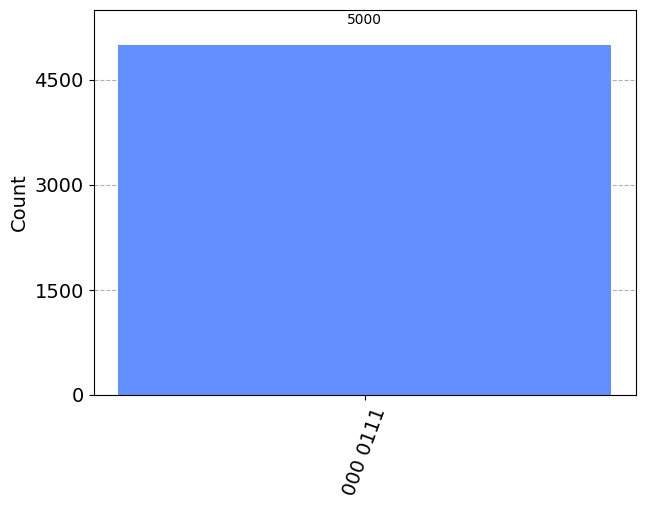

In [271]:
# Simulate and plot results
qasm_simulator = Aer.get_backend('qasm_simulator')
#transpiled_qc = transpile(qc, qasm_simulator)
# Execute circuit and show results
ex = execute(qc, qasm_simulator, shots = 5000)
res = ex.result().get_counts(qc)
plot_histogram(res)

# Deutsh Jozsa Algorithm [Done]

Following Textbook: https://learn.qiskit.org/course/ch-algorithms/deutsch-jozsa-algorithm

In [228]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [229]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

In [230]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

Full Algorithm

In [231]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

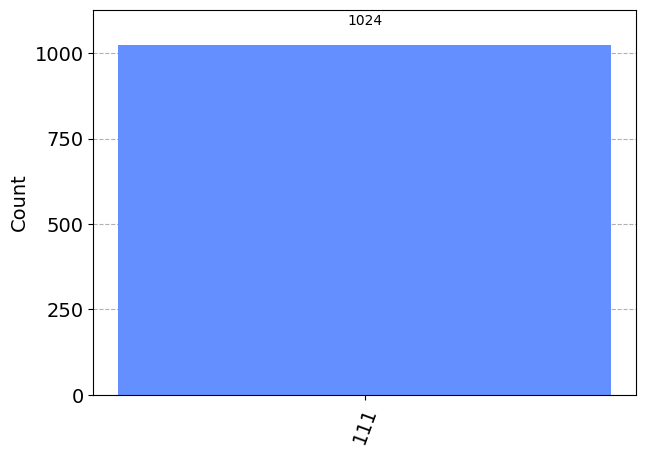

In [232]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

Generalized Circuits

In [233]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [234]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

In [235]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

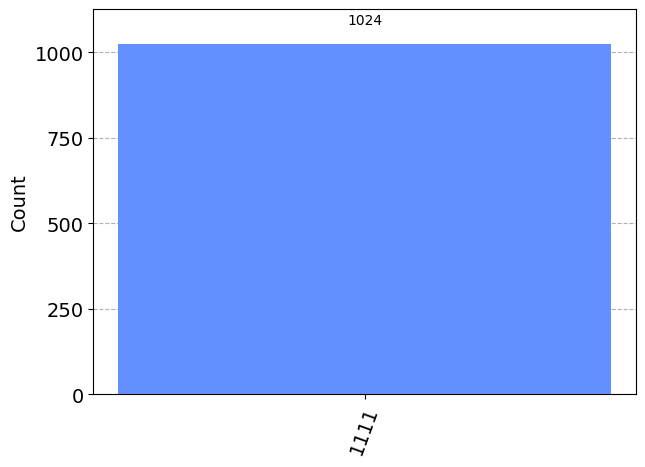

In [236]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
results = aer_sim.run(transpiled_dj_circuit).result()
answer = results.get_counts()
plot_histogram(answer)

## Problems

> 1. Are you able to create a balanced or constant oracle of a different form?

Yes you can create different types of balanced or constant oracles. E.g. You can create a balanced oracle for a function that returns 1 for half of inputs and 0 for other half, but at a different pattern. For Constant oracles it always outputs the same value regardless of input, so there is less possible variation for how to implement that.

In [237]:
# Example of a balanced oracle that flips output qubit if input has odd number of ones

def balanced_oracle(n):
    oracle_qc = QuantumCircuit(n+1)
    for qubit in range(n):
        oracle_qc.cx(qubit, n)
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Balanced Oracle"
    return oracle_gate


2. The function dj_problem_oracle (below) returns a Deutsch-Jozsa oracle for n = 4 in the form of a gate. The gate takes 5 qubits as input where the final qubit (q_4) is the output qubit (as with the example oracles above). You can get different oracles by giving dj_problem_oracle different integers between 1 and 5. Use the Deutsch-Jozsa algorithm to decide whether each oracle is balanced or constant (Note: It is highly recommended you try this example using the aer_simulator instead of a real device).

In [238]:
from qiskit_textbook.problems import dj_problem_oracle

for i in range(1, 6):
    oracle = dj_problem_oracle(i)
    dj_circuit = dj_algorithm(oracle, n)
    transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
    results = aer_sim.run(transpiled_dj_circuit).result()
    answer = results.get_counts()
    print(f"Oracle {i} result distribution:")
    print(answer)
    if '0'*n in answer:
        print(f"constant")
    else:
        print(f"balanced")
    print("\n")


Oracle 1 result distribution:
{'1111': 1024}
balanced


Oracle 2 result distribution:
{'0000': 1024}
constant


Oracle 3 result distribution:
{'1111': 244, '0011': 278, '0001': 260, '1101': 242}
balanced


Oracle 4 result distribution:
{'0100': 1024}
balanced


There are only currently 4 oracles in this problem set, returning empty (balanced) gate
Oracle 5 result distribution:
{'0000': 1024}
constant


